Demonstrate Quantum Teleportation of the |Ψ> = 1/rt3 |0> + rt(2/3) |1> from Alice to Bob.

In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit
import math

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-12-02 13:21:57,019: Credentials are already in use. The existing account in the session will be replaced.


<IPython.core.display.Latex object>

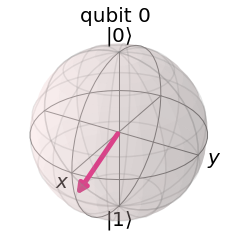

In [4]:
state=[1/math.sqrt(3), math.sqrt(2/3)]
psi=state
display(array_to_latex(psi,prefix="|\\psi\\rangle = "))
plot_bloch_multivector(psi)

In [5]:
def bellpair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)
    #1st bell pair

In [6]:
def alice(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)

In [7]:
def measure_send(qc,a,b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [9]:
def bob(qc,qubit,crz,crx):
    qc.x(qubit).c_if(crx,1)
    qc.z(qubit).c_if(crz,1)

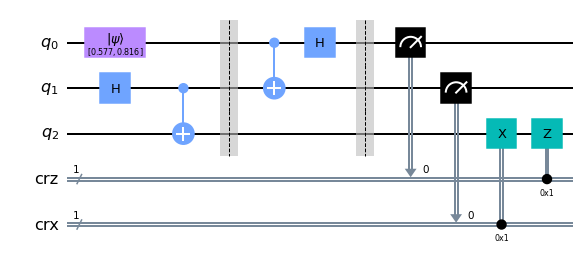

In [10]:
qr=QuantumRegister(3,name='q')
crz= ClassicalRegister(1,name='crz')
crx=ClassicalRegister(1,name='crx')
qc = QuantumCircuit(qr,crz,crx)

qc.initialize(psi,0)

bellpair(qc,1,2)
qc.barrier()

alice(qc,0,1)

measure_send(qc,0,1)

bob(qc,2,crz,crx)


qc.draw()

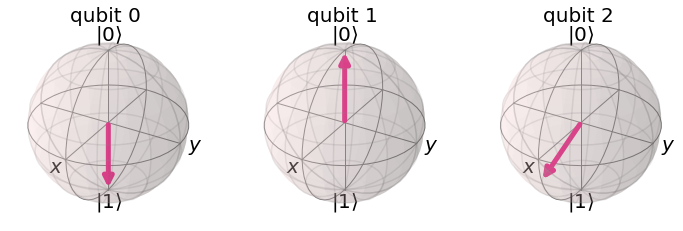

In [11]:
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()
out_vector=sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)